**Importing the necessary libraries.**

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
import itertools
from collections import Counter
from itertools import combinations
from sklearn.model_selection import train_test_split,GridSearchCV,cross_validate,RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures, RobustScaler, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, precision_score, recall_score, accuracy_score

**Data Sourcing**

In [2]:
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [3]:
pd.options.display.max_columns = 100

In [ ]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


**Basic Data Analysis**

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [4]:
# df.duplicated().value_counts()

<Axes: >

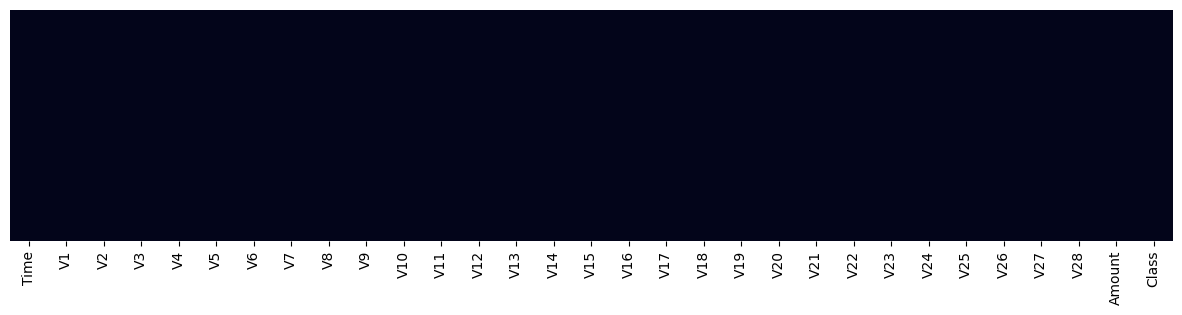

In [ ]:
plt.figure(figsize=(15,3))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

<Axes: >

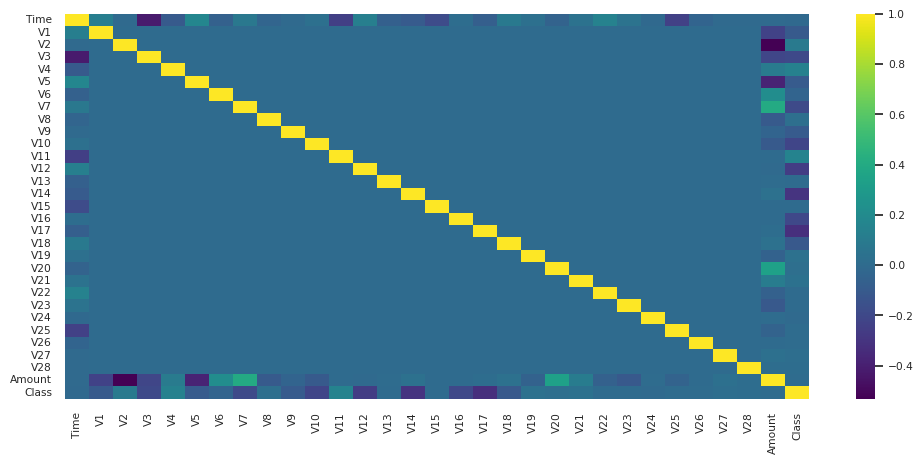

In [ ]:
sns.set(font_scale=0.7)
plt.figure(figsize=(12,5))
corr = df.corr()
sns.heatmap(corr,cmap='viridis')

<Axes: >

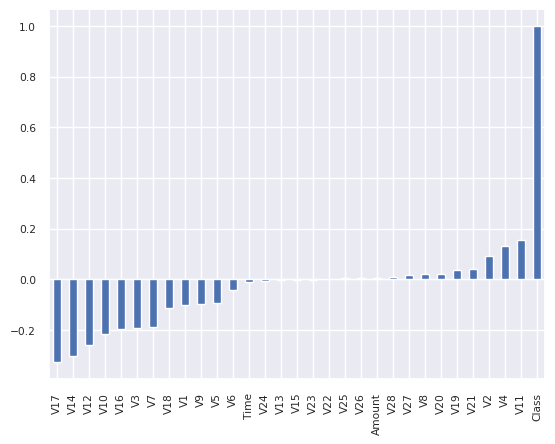

In [ ]:
corr['Class'].sort_values().plot(kind='bar')
plt.title('Correlation between our variables and Class')

In [ ]:
corr['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

**Findings from basic eda**


*   No missingness within the dataset
*   Target variable is a discrete value,[0,1](Binary Classification problem)
*   There seems to be more of a negative correlation between our variables and the target variable.





# EDA

**Visualization of Time and Amount features**

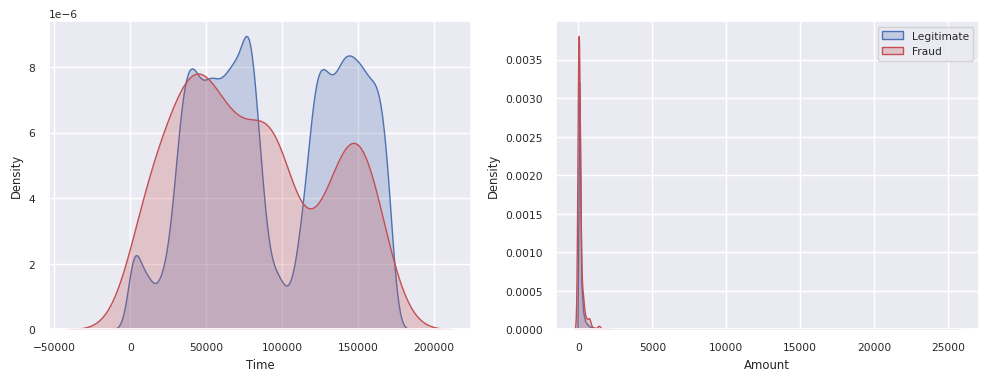

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(12,4))
sns.kdeplot(df['Time'][df['Class'] == 0],fill=True,color='b',ax=ax[0])
sns.kdeplot(df['Time'][df['Class'] == 1],fill=True,color='r',ax=ax[0])
sns.kdeplot(df['Amount'][df['Class'] == 0],fill=True,color='b',ax=ax[1],label='Legitimate')
sns.kdeplot(df['Amount'][df['Class'] == 1],fill=True,color='r',ax=ax[1],label='Fraud')
plt.legend()

<Axes: xlabel='Amount'>

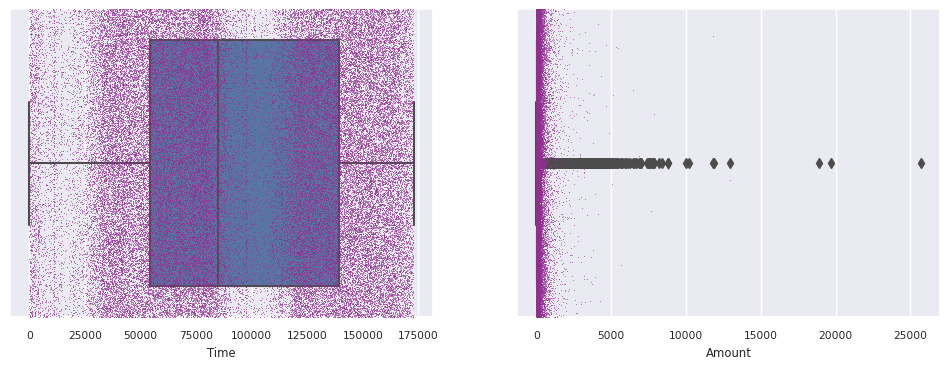

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(12,4))
sns.boxplot(data=df,x='Time',ax=ax[0])
sns.stripplot(data=df,x='Time',color='magenta',jitter=2,size=0.5,ax=ax[0])
sns.boxplot(data=df,x='Amount',ax=ax[1])
sns.stripplot(data=df,x='Amount',color='magenta',jitter=2,size=0.5,ax=ax[1])

**Univariate Analysis**

<ipython-input-19-42d2b47fcce7>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df.columns[i]][df['Class'] == 0],fill=True,color='b')
<ipython-input-19-42d2b47fcce7>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df.columns[i]][df['Class'] == 1],fill=True,color='r')


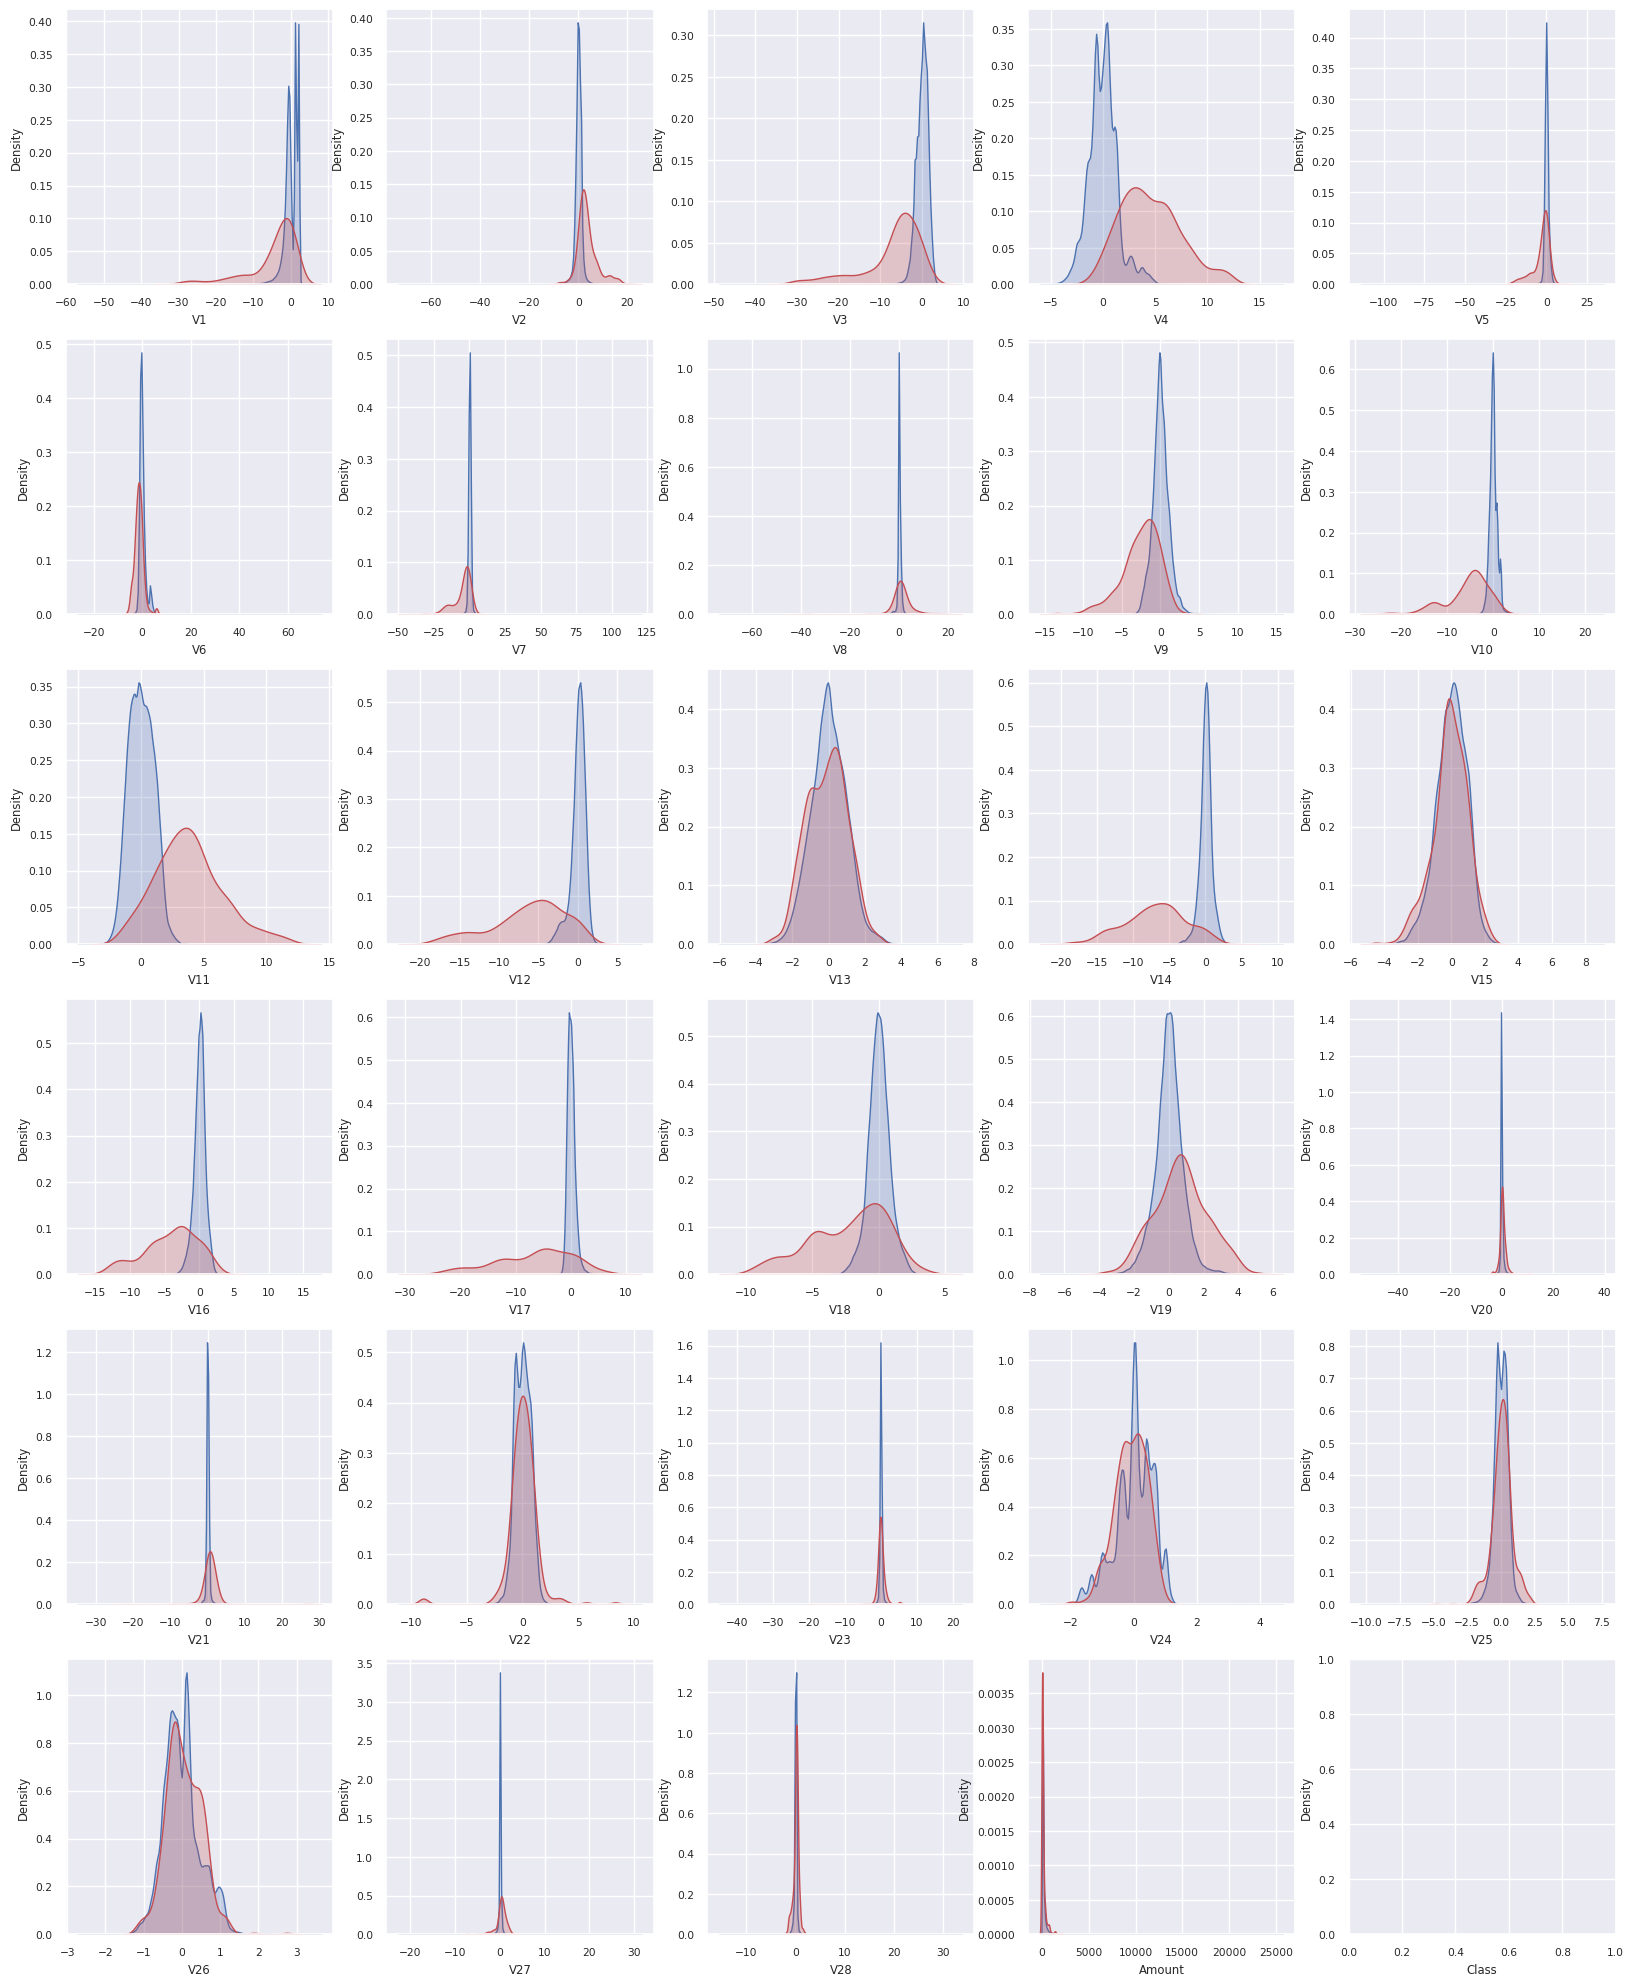

In [ ]:
fig = plt.figure(figsize=(20,25))
for i in range(1,len(df.columns)):
  ax = fig.add_subplot(6,5,i)
  sns.kdeplot(df[df.columns[i]][df['Class'] == 0],fill=True,color='b')
  sns.kdeplot(df[df.columns[i]][df['Class'] == 1],fill=True,color='r')

**Bivariate Analysis**

In [ ]:
features = ['V1','V18','V7','V3','V16','V10','V12','V14','V17','V11','V4']
data = df[features]
comb = list(itertools.combinations([a for a in range(1, len(data.columns))], 2))

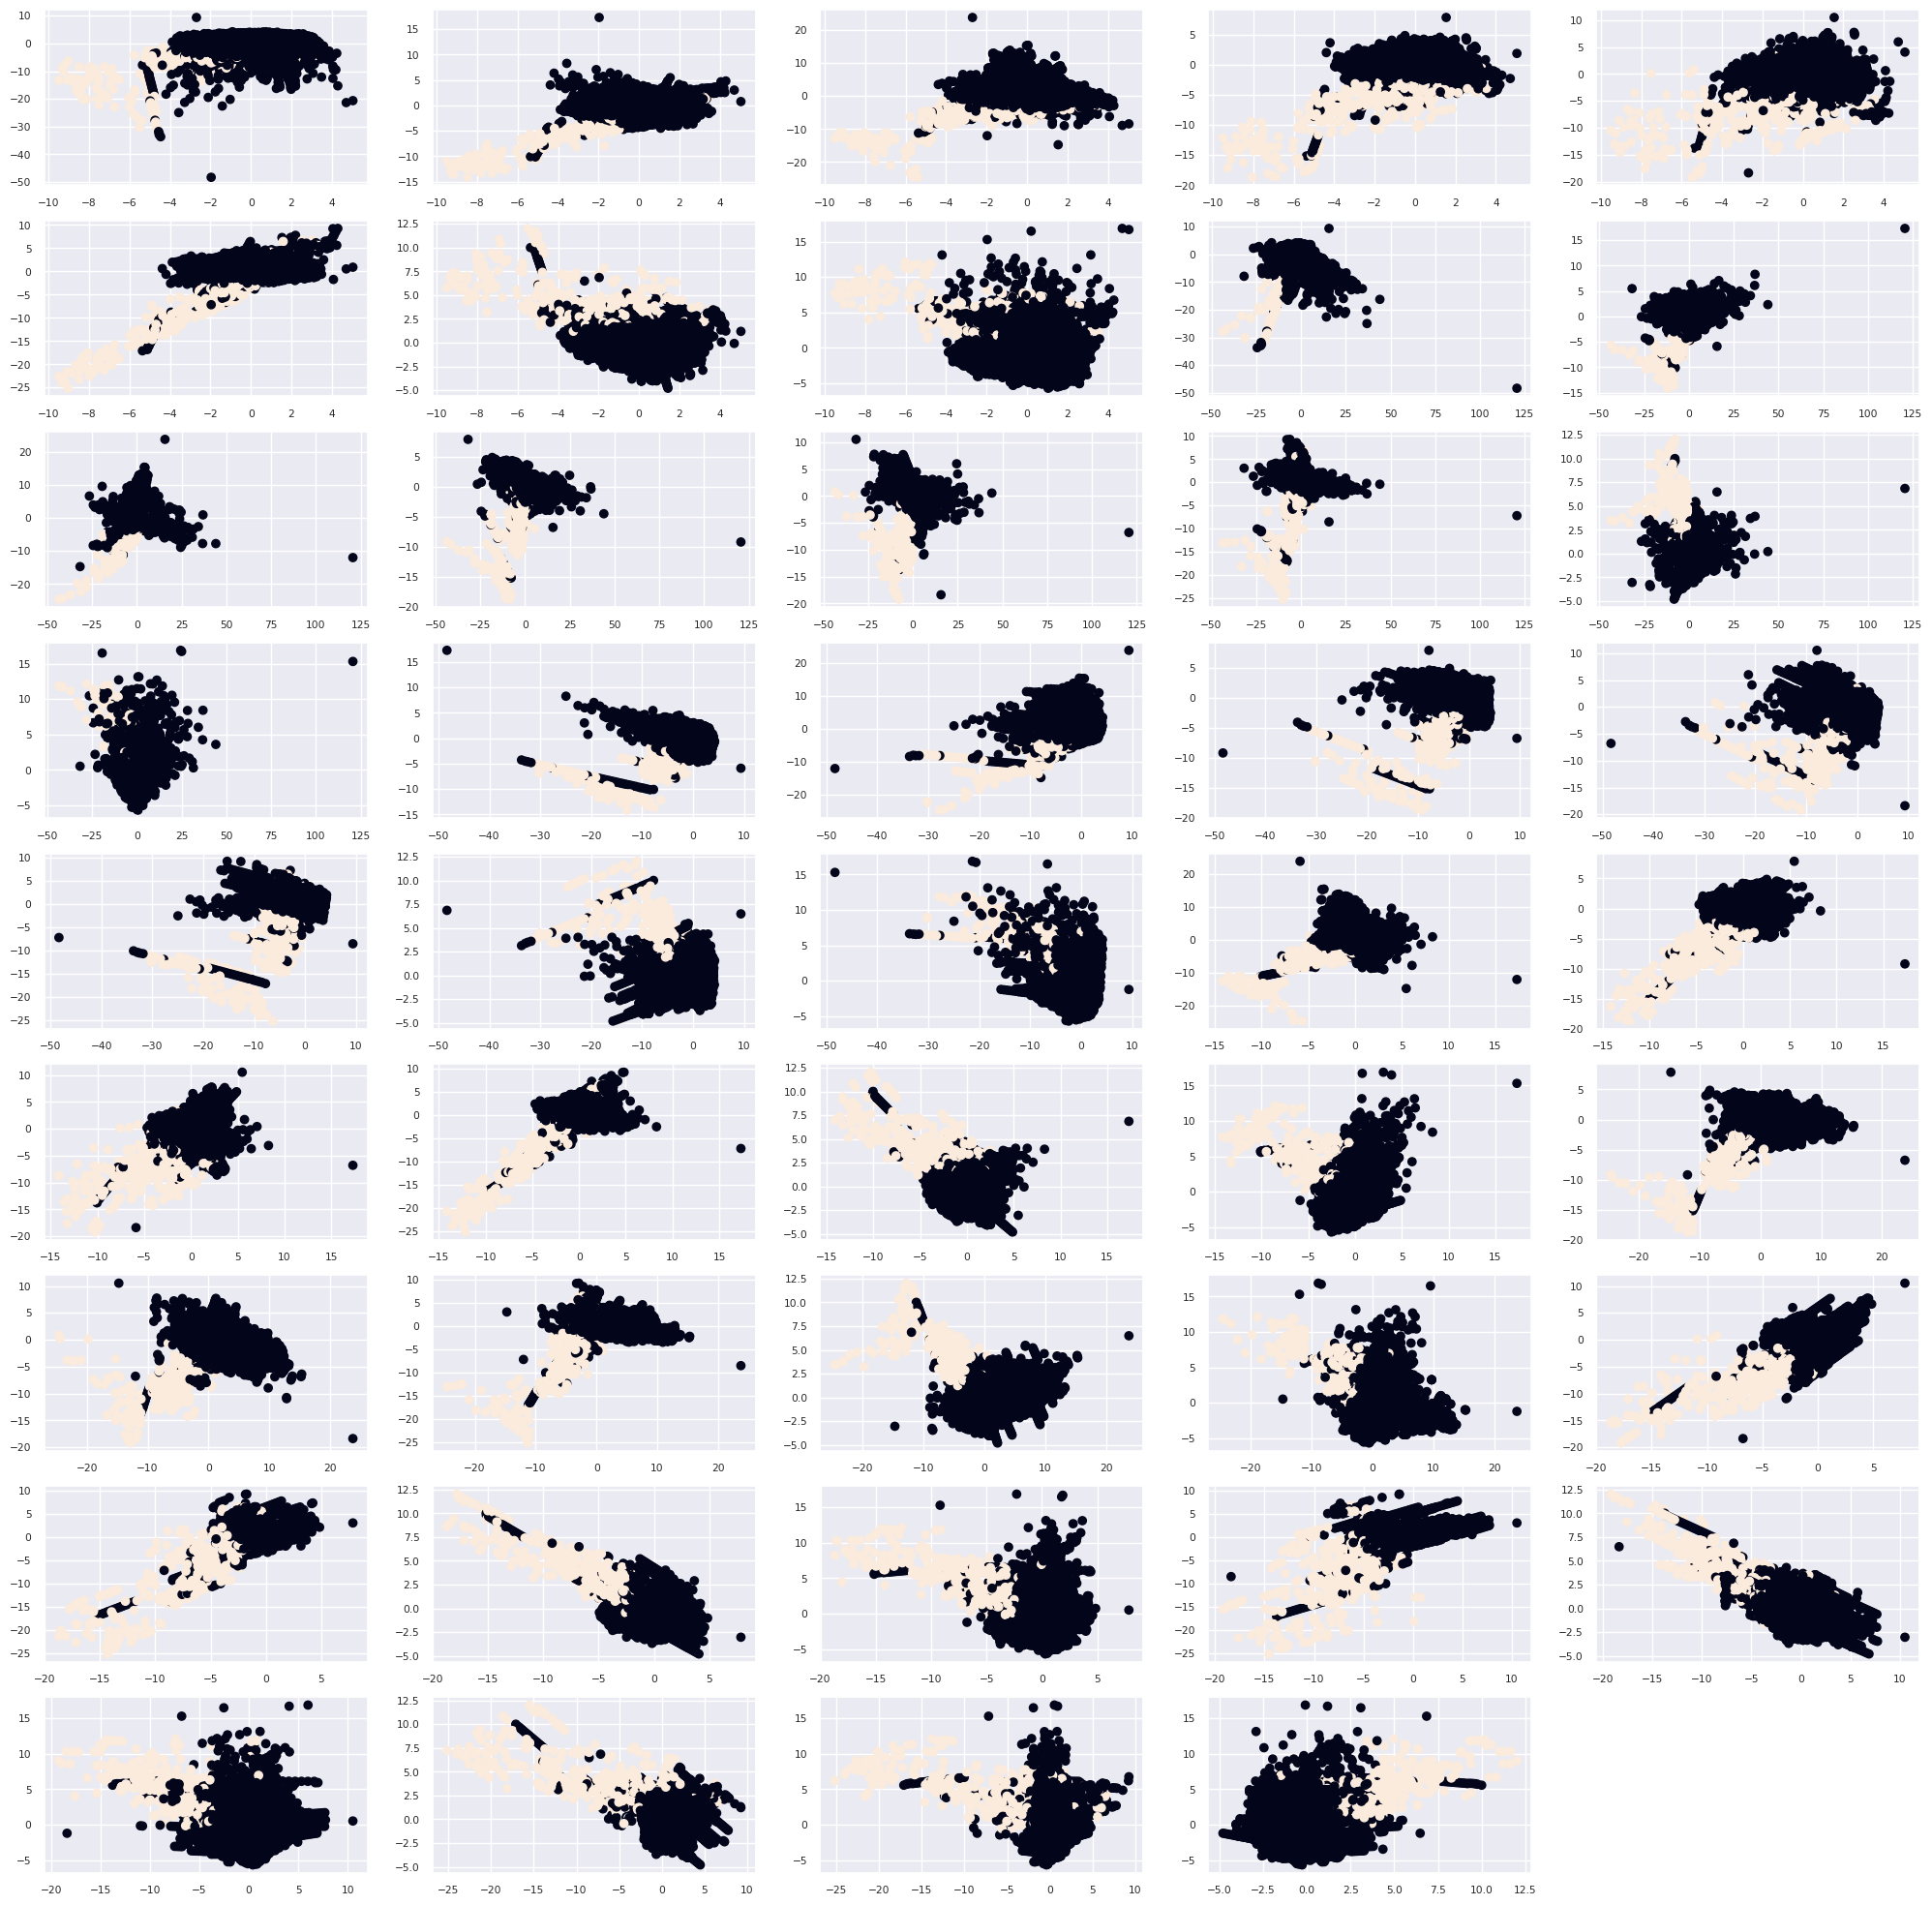

In [ ]:
fig = plt.figure(figsize=(25,25))
for i in range(1,len(comb)):
  fig.add_subplot(9,5,i)
  plt.scatter(data[data.columns[comb[i][0]]],data[data.columns[comb[i][1]]],c=df.Class)

**Feature Scaling**

*   We'll use a standard scaler for Time feature(No outliers)
*   Robust scaler for amount(Outliers are present)



In [3]:
std_scl = StandardScaler()
rbt_scl = RobustScaler()

df['Time'] = std_scl.fit_transform(df['Time'].values.reshape(-1,1))
df['Amount'] = rbt_scl.fit_transform(df['Amount'].values.reshape(-1,1))

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


**Class Distribution**

<Axes: >

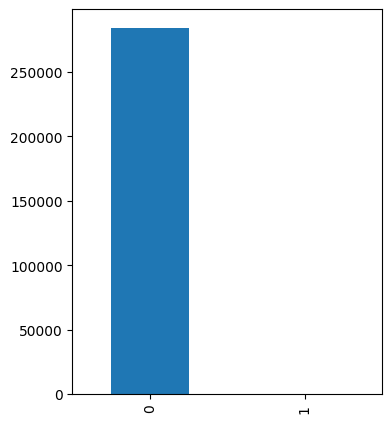

In [ ]:
df['Class'].value_counts().plot(kind='bar',figsize=(4,5))

# Data Modelling.

**Splitting the data**

In [4]:
X = df.drop(['Class'],axis=1)
y = df['Class']

In [5]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2,stratify=y)

In [17]:
print(x_train.shape,y_train.shape)

(227845, 30) (227845,)


In [18]:
print(X.shape,y.shape)

(284807, 30) (284807,)


In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Baseline Modelling**

**Logistic Regression**

**Defining functions for modelling**

In [6]:
def modelling_samp(model):
  steps = [('over', SMOTE()), ('model', model)]
  pipeline = Pipeline(steps=steps)
  st_kf = StratifiedKFold(n_splits=5)
  scores = cross_validate(pipeline, x_train, y_train, scoring=['recall','precision','f1'], cv=st_kf)
  for key,value in scores.items():
    print(key, value, value.mean())

In [7]:
def modelling_under_samp(model):
  steps = [('under', NearMiss()), ('model', model)]
  pipeline = Pipeline(steps=steps)
  st_kf = StratifiedKFold(n_splits=5)
  scores = cross_validate(pipeline, x_train, y_train, scoring=['recall','precision','f1'], cv=st_kf)
  for key,value in scores.items():
    print(key, value, value.mean())

In [9]:
def modelling(model):
  st_kf = StratifiedKFold(n_splits=5)
  scores = cross_validate(model, x_train, y_train, scoring=['recall','precision','f1'], cv=st_kf)
  for key,value in scores.items():
    print(key, value, value.mean())

**Logistic Regression**

***Modelling with class imbalance only tweaking the class weights***

In [ ]:
modelling(LogisticRegression(max_iter=1000))

fit_time [4.48642039 3.4491241  2.38442373 2.83128786 2.24484849] 3.079220914840698
score_time [0.13079715 0.06335068 0.06592059 0.06314278 0.07673526] 0.07998929023742676
test_recall [0.70512821 0.56962025 0.55696203 0.67088608 0.72151899] 0.6448231093800714
test_precision [0.93220339 0.88235294 0.84615385 0.85483871 0.85074627] 0.8732590310989922
test_f1 [0.80291971 0.69230769 0.67175573 0.75177305 0.78082192] 0.7399156185962676


In [ ]:
modelling(LogisticRegression(max_iter=1000,class_weight='balanced'))

fit_time [3.07868314 3.71571279 2.00443459 1.92163038 2.867203  ] 2.717532777786255
score_time [0.0649147  0.1345346  0.0651741  0.06424999 0.06522775] 0.07882022857666016
test_recall [0.92307692 0.83544304 0.86075949 0.93670886 0.94936709] 0.9010710808179162
test_precision [0.05611847 0.06049496 0.06055209 0.05873016 0.05030181] 0.05723949865766907
test_f1 [0.10580456 0.11282051 0.11314476 0.11053025 0.0955414 ] 0.10756829495126638


In [ ]:
modelling(LogisticRegression(max_iter=1000,class_weight={0:1,1:10}))

fit_time [2.38969946 3.28721571 2.04162717 2.04177976 1.96955132] 2.3459746837615967
score_time [0.12877941 0.06392193 0.0679884  0.08071494 0.06500554] 0.08128204345703124
test_recall [0.83333333 0.7721519  0.7721519  0.74683544 0.87341772] 0.7995780590717299
test_precision [0.79268293 0.7721519  0.7625     0.77631579 0.75824176] 0.7723784746557776
test_f1 [0.8125     0.7721519  0.7672956  0.76129032 0.81176471] 0.7850005049362905


In [ ]:
modelling(LogisticRegression(max_iter=1000,class_weight={0:1,1:12.5}))

fit_time [1.8697226  1.95160222 3.262537   2.30953884 1.87390351] 2.2534608364105226
score_time [0.0832901  0.06359339 0.13024211 0.06348777 0.06577182] 0.08127703666687011
test_recall [0.83333333 0.7721519  0.7721519  0.75949367 0.87341772] 0.8021097046413501
test_precision [0.76470588 0.75308642 0.74390244 0.76923077 0.71134021] 0.7484531433093509
test_f1 [0.79754601 0.7625     0.75776398 0.76433121 0.78409091] 0.7732464213414422


***Applying Oversampling using Smote***

In [ ]:
modelling_samp(LogisticRegression(max_iter=1000))

fit_time [7.80491829 4.6128664  5.88183022 4.93588257 5.89799047] 5.826697587966919
score_time [0.0649507  0.06387091 0.0656395  0.0650773  0.1335454 ] 0.07861676216125488
test_recall [0.91025641 0.84810127 0.86075949 0.91139241 0.94936709] 0.8959753326841934
test_precision [0.05282738 0.05955556 0.05629139 0.05243991 0.05119454] 0.054461755817141154
test_f1 [0.09985935 0.11129568 0.10567211 0.09917355 0.09715026] 0.10263019050910087


In [ ]:
modelling_samp(LogisticRegression(max_iter=1000,class_weight={0:1,1:12.5}))

fit_time [ 8.14737296  7.0455997   7.0009985   7.68350768 10.50636029] 8.076767826080323
score_time [0.14569759 0.07663584 0.14453793 0.07877254 0.07123685] 0.10337615013122559
test_recall [0.94871795 0.94936709 0.93670886 0.98734177 0.96202532] 0.9568321973385265
test_precision [0.00849403 0.00985545 0.00964421 0.00839161 0.00808425] 0.00889390925600106
test_f1 [0.01683732 0.01950839 0.01909185 0.01664178 0.01603376] 0.017622616280018953


In [ ]:
modelling_samp(LogisticRegression(max_iter=1000,class_weight={0:1,1:10}))

fit_time [11.2462709   5.36804748  7.56103039  5.72569561  7.12212324] 7.404633522033691
score_time [0.0705626  0.0727067  0.06985974 0.06994414 0.13935685] 0.08448600769042969
test_recall [0.93589744 0.94936709 0.92405063 0.98734177 0.94936709] 0.9492048036351834
test_precision [0.009141   0.01129688 0.01087766 0.00949367 0.00888731] 0.009939304430252741
test_f1 [0.01810516 0.02232807 0.02150221 0.01880651 0.01760977] 0.01967034383791002


**Random Forest Classifier**

***On over_sampled dataset(SMOTE)***

In [ ]:
modelling_samp(RandomForestClassifier(n_estimators=100))

fit_time [260.22801685 264.56707764 262.73212028 259.79679227 257.25320053] 260.9154415130615
score_time [0.53686357 0.45685339 0.42425108 0.43987298 0.45387053] 0.4623423099517822
test_recall [0.69230769 0.82278481 0.84810127 0.84810127 0.81012658] 0.8042843232716651
test_precision [0.93103448 0.91549296 0.93055556 0.84810127 0.87671233] 0.9003793181301127
test_f1 [0.79411765 0.86666667 0.88741722 0.84810127 0.84210526] 0.8476816122498432


In [15]:
modelling_samp(RandomForestClassifier(n_estimators=200))

fit_time [887.96126008 922.30526209 939.92716074 910.09014893 948.60824561] 921.7784154891967
score_time [1.25253344 1.28142643 1.42900443 1.35645151 1.64890099] 1.3936633586883544
test_recall [0.74358974 0.79746835 0.79746835 0.82278481 0.87341772] 0.8069457968192145
test_precision [0.86567164 0.94029851 0.88732394 0.89041096 0.87341772] 0.89142455466776
test_f1 [0.8        0.8630137  0.84       0.85526316 0.87341772] 0.8463389156087724


***On under_sampled dataset(NearMiss)***

In [ ]:
modelling_under_samp(RandomForestClassifier(n_estimators=100))

fit_time [0.61304879 0.60221434 0.62434673 1.00423956 0.99311423] 0.7673927307128906
score_time [0.28991771 0.29595375 0.3728652  0.33870387 0.32868409] 0.3252249240875244
test_recall [0.97435897 0.97468354 0.98734177 0.98734177 0.94936709] 0.9746186303148328
test_precision [0.0017053  0.00176674 0.00197824 0.00178973 0.00185915] 0.0018198322734987408
test_f1 [0.00340464 0.00352709 0.00394857 0.00357298 0.00371103] 0.003632863069970584


***Tweaking the class weights on under_sampling***

In [ ]:
class_weights = {0:0.1,1:100}
modelling_under_samp(RandomForestClassifier(n_estimators=100,class_weight=class_weights))

fit_time [0.64568448 0.74101949 0.62018561 0.59255981 0.61147237] 0.6421843528747558
score_time [0.63864636 0.33213377 0.34581542 0.32324433 0.3335526 ] 0.39467849731445315
test_recall [0.88461538 0.94936709 0.89873418 0.93670886 0.89873418] 0.9136319376825707
test_precision [0.00282521 0.00293807 0.01864006 0.00266782 0.00358695] 0.0061316200385431036
test_f1 [0.00563242 0.005858   0.03652263 0.00532049 0.00714537] 0.01209578390660579


In [ ]:
class_weights = {0:100,1:0.1}
modelling_under_samp(RandomForestClassifier(n_estimators=100,class_weight=class_weights))

fit_time [0.88529754 1.13762593 0.81665802 0.67375231 0.66580534] 0.8358278274536133
score_time [0.33473468 0.3732748  0.35929489 0.32193661 0.33161545] 0.34417128562927246
test_recall [0.97435897 0.98734177 0.97468354 0.98734177 0.97468354] 0.9796819214540733
test_precision [0.0016992  0.00181021 0.0018988  0.00178543 0.00186139] 0.0018110031992738733
test_f1 [0.00339248 0.00361379 0.00379021 0.00356441 0.00371568] 0.003615312983364611


**Support Vector Classifier**

In [ ]:
from sklearn.svm import SVC

In [ ]:
st_kf = StratifiedKFold(n_splits = 5)
steps = [('over',SMOTE()),('model',SVC(kernel='rbf',C=10))]
pipe = Pipeline(steps=steps)
scores = cross_validate(pipe,x_train,y_train,cv=st_kf,scoring = ['precision','recall','f1'])
for key,value in scores.items():
  print(key,value,value.mean())

fit_time [1153.18153095 1288.34264302  800.38961768  980.96724176 1015.96089005] 1047.768384695053
score_time [79.69424415 82.31078362 69.26664925 74.23882031 79.33976316] 76.9700520992279
test_precision [0.11913357 0.09728868 0.13551402 0.1559633  0.13043478] 0.12766687085916859
test_recall [0.84615385 0.7721519  0.73417722 0.86075949 0.83544304] 0.8097370983446932
test_f1 [0.20886076 0.17280453 0.22879684 0.26407767 0.22564103] 0.22003616635939452


**K Nearest Neighbors**

***On SMOTE dataset***

In [ ]:
modelling_samp(KNeighborsClassifier(n_neighbors=5))

fit_time [0.40902185 0.2194221  0.197469   0.41981006 0.23151302] 0.29544720649719236
score_time [61.98484087 61.8586812  61.20984888 60.66371226 61.917454  ] 61.526907444000244
test_recall [0.78205128 0.89873418 0.84810127 0.86075949 0.84810127] 0.8475494969165854
test_precision [0.43884892 0.4382716  0.37640449 0.42236025 0.45890411] 0.42695787564396986
test_f1 [0.56221198 0.58921162 0.52140078 0.56666667 0.59555556] 0.567009320051284


***On under_sampled dataset***

In [ ]:
modelling_under_samp(KNeighborsClassifier(n_neighbors=5))


fit_time [0.4093318  0.73330712 0.40727949 0.40198374 0.40476274] 0.4713329792022705
score_time [1.23532367 1.27517033 0.81465316 0.80287719 0.79664803] 0.9849344730377197
test_recall [0.85897436 0.94936709 0.87341772 0.92405063 0.87341772] 0.8958455047062641
test_precision [0.00522621 0.0072338  0.01156748 0.00457021 0.00725018] 0.007169575681629063
test_f1 [0.01038921 0.01435819 0.02283256 0.00909544 0.01438099] 0.014211277940241893


**Takeaways from modelling:**

*   Scores from a basic logistic regression model were quite descent with both precision and recall getting close to the 80% mark especially after class weight tweaking.
*   Undersampling modelling was underwhelming despite the model apllied and class weight applied.
*   Overall, oversampling seemed to provide the best tradeoff between precision and recall.
*   We'll be proceeding with our oversampled data on RandomForestClassifier for tuning and improvement.





**Model Performance on RandomForestClassifier**

In [11]:
smote = SMOTE()
x_train_s,y_train_s = smote.fit_resample(x_train,y_train)

print(Counter(y_train))
print(Counter(y_train_s))

Counter({0: 227451, 1: 394})
Counter({0: 227451, 1: 227451})


Text(0.5, 1.0, 'Precision Recall Curve')

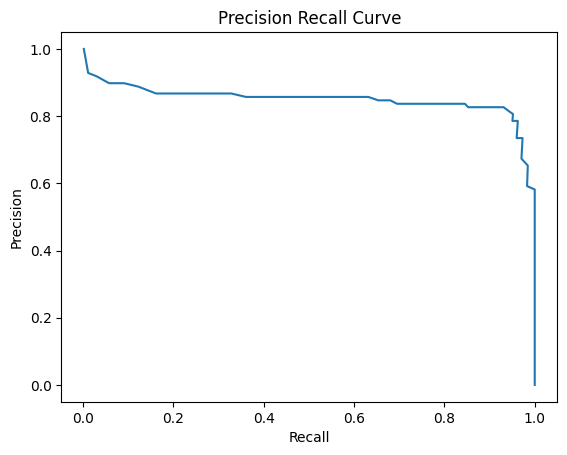

In [14]:
model = RandomForestClassifier(n_estimators=100,oob_score=True, n_jobs=-1, random_state=1)
model.fit(x_train_s, y_train)
y_pred = model.predict(x_test)

y_pred_prob = model.predict_proba(x_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.81      0.87        98

    accuracy                           1.00     56962
   macro avg       0.98      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Text(0.5, 1.0, 'Precision Recall Curve')

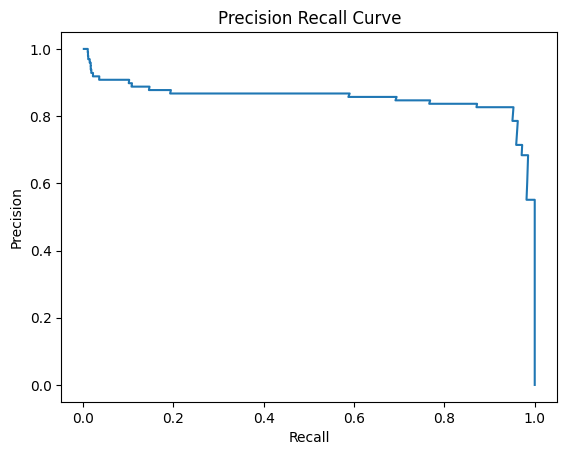

In [22]:
model = RandomForestClassifier(n_estimators=1000, min_samples_split=10, min_samples_leaf=1,
           max_features='auto', max_leaf_nodes=None,oob_score=True, n_jobs=-1, random_state=1)
model.fit(x_train_s, y_train_s)
y_pred = model.predict(x_test)

y_pred_prob = model.predict_proba(x_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.82      0.88        98

    accuracy                           1.00     56962
   macro avg       0.98      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



**Hyperparameter Tuning**

**RandomForestClassifier**

In [ ]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [22]:
param_grid = {'rf__n_estimators':[100],
              'rf__criterion':['gini','entropy'],
              'rf__max_features':['log2',None]
              }